### Мастерская №1 ### 

**Описание:** Анализ данных вакансий HH.ru

**Цель проекта:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.


**Описание полей в данных**

- `id` - Уникальный идентификатор вакансии;
- `name` - Название вакансии;
- `published_at` - Дата публикации. 
- `alternate_url` - Ссылка на вакансию. 
- `type` - Статус вакансии на момент получения данных от api и передачи их в базу.  
- `employer` - Работодатель. 
- `department` - Работодатель, отдел. 
- `area` - Регион места работы. 
- `experience` - Требуемый опыт работы. 
- `key_skills` - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.  
- `schedule` - График работы. 
- `employment` - Тип занятости. 
- `description` - Описание вакансии. 
- `description_lemmatized` - Лемматизированное описание вакансии. 
- `salary_from` - Нижняя граница предлагаемой заработной платы. 
- `salary_to` - Верхняя граница предлагаемой заработной платы. 
- `salary_bin` - Категория зарплаты. 
- `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии key_skills. 
- `hard_skills_from_description` - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.
- `soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    da = pd.read_excel('C:/Users/Lenovo/Documents/Data Analyst/Платный/vacancies_da (1).xlsx')
except:
    da = pd.read_excel('/datasets/vacancies_da (1).xlsx')
display(da)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,99985864,Аналитик данных в отдел онлайн-маркетинга (мон...,2024-05-23 18:41:27,https://hh.ru/vacancy/99985864,Открытая,Леруа Мерлен,ИТ,Москва,Junior+ (1-3 years),"['Проактивность', 'Коммуникация', 'SQL', 'ad-h...",Гибкий график,Полная занятость,леруа мерлен — data-driven компания с передовы...,леруа мерлен data driven компания передовой ит...,NaN,NaN,ЗП не указана,"SQL, ad-hoc, A/B тесты, ETL, LTV, Python, Post...",NaN,"Коммуникация, Проактивность"
1797,99986822,Аналитик данных/специалист Excel,2024-06-10 18:58:20,https://hh.ru/vacancy/99986822,Открытая,СКАЙ БОНД,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Грамотная речь', 'Сводные таблицы', 'Сбор и ...",Удаленная работа,Полная занятость,sky bond – это агентство финансовых консультан...,sky bond агентство финансовый консультант евро...,50000.0,NaN,ЗП не указана,"Пользователь ПК, Работа в команде, Грамотная р...",NaN,NaN
1798,99988999,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:35:56,https://hh.ru/vacancy/99988999,Открытая,Марс,NaN,Ступино,Junior+ (1-3 years),"['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...",Гибкий график,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не указана,"MS Power BI, Аналитика, Python, SQL, Tableau, ...",NaN,NaN
1799,99989203,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:40:04,https://hh.ru/vacancy/99989203,Открытая,Марс,NaN,Одинцово,Junior+ (1-3 years),"['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...",Полный день,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не у

Загрузил сырые данные вакансий в должность аналитика данных. В них оказалось 1801 вакансий 

In [3]:
try:
    sa = pd.read_excel('C:/Users/Lenovo/Documents/Data Analyst/Платный/vacancies_sa.xlsx')
except:
    sa = pd.read_excel('/datasets/vacancies_sa.xlsx')
sa

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,99936919,Бизнес-аналитик / Системный аналитик (продукто...,2024-07-02 13:26:24,https://hh.ru/vacancy/99936919,Открытая,Первая Форма,NaN,Нижний Новгород,Junior+ (1-3 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
1911,99938797,Системный аналитик,2024-07-07 14:07:50,https://hh.ru/vacancy/99938797,Открытая,Газпром межрегионгаз инжиниринг,NaN,Санкт-Петербург,Junior+ (1-3 years),"['IDEF', 'Разработка технических заданий', 'RE...",Полный день,Полная занятость,"обязанности: сбор, анализ, обобщение, описани...",обязанность сбор анализ обобщение описание общ...,NaN,NaN,ЗП не указана,"IDEF, SQL, UML, BPMN, Разработка технических з...",NaN,Документация
1912,99951680,Ведущий системный аналитик 1С,2024-07-05 11:16:55,https://hh.ru/vacancy/99951680,Открытая,Novabev Group,Novabev Group. IT & E-Com,Владивосток,Middle (3-6 years),[],Удаленная работа,Полная занятость,"novabev group объединяет тех, кому важно расти...",novabev group объединять важно расти развивать...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1913,99975404,Системный аналитик/System Analyst (junior),2024-07-07 15:12:34,https://hh.ru/vacancy/99975404,Открытая,Aston,NaN,Уфа,Junior+ (1-3 years),"['SOA', 'XML', 'Atlassian Jira', 'Use cases', ...",Удаленная работа,Полная занятость,системный аналитик / system analyst junior мы ...,системный аналитик system analyst junior аутсо...,80000.0,110000.0,От 100 тысяч до 200 тысяч,"Системный анализ, System Analysis, Use cases, ...",confluence,NaN


точно также как в предыдущем случае, Загрузил сырые данные вакансий в должность системного аналитика. В них оказалось 1915 вакансий

In [4]:
result = pd.concat([da, sa], axis=0, ignore_index=True)
result

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,99936919,Бизнес-аналитик / Системный аналитик (продукто...,2024-07-02 13:26:24,https://hh.ru/vacancy/99936919,Открытая,Первая Форма,NaN,Нижний Новгород,Junior+ (1-3 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
3712,99938797,Системный аналитик,2024-07-07 14:07:50,https://hh.ru/vacancy/99938797,Открытая,Газпром межрегионгаз инжиниринг,NaN,Санкт-Петербург,Junior+ (1-3 years),"['IDEF', 'Разработка технических заданий', 'RE...",Полный день,Полная занятость,"обязанности: сбор, анализ, обобщение, описани...",обязанность сбор анализ обобщение описание общ...,NaN,NaN,ЗП не указана,"IDEF, SQL, UML, BPMN, Разработка технических з...",NaN,Документация
3713,99951680,Ведущий системный аналитик 1С,2024-07-05 11:16:55,https://hh.ru/vacancy/99951680,Открытая,Novabev Group,Novabev Group. IT & E-Com,Владивосток,Middle (3-6 years),[],Удаленная работа,Полная занятость,"novabev group объединяет тех, кому важно расти...",novabev group объединять важно расти развивать...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3714,99975404,Системный аналитик/System Analyst (junior),2024-07-07 15:12:34,https://hh.ru/vacancy/99975404,Открытая,Aston,NaN,Уфа,Junior+ (1-3 years),"['SOA', 'XML', 'Atlassian Jira', 'Use cases', ...",Удаленная работа,Полная занятость,системный аналитик / system analyst junior мы ...,системный аналитик system analyst junior аутсо...,80000.0,110000.0,От 100 тысяч до 200 тысяч,"Системный анализ, System Analysis, Use cases, ...",confluence,NaN


ЧТобы работать 1-й таблицей, я решил соединить эти таблицы в итоге получиось 3716 вакансий (S/A 1915 + D/A 1801 = 3716)

**1. Предоюработка данных**

In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null 

Проверяем типы данных и по необходисти меняем типы. Все типы данных правильно указаны, менять нет необходимости.

In [6]:
result.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          2834
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         3012
salary_to                           3209
salary_bin                             0
key_skills_from_key_skills_field    1349
hard_skills_from_description        2728
soft_skills_from_description        1701
dtype: int64

Проверяем пропуски. Большой пропуск имеется в столбцах department, salary_from, salary_to, hard_skills_from_description. Вполне возможно, что это объясняется тем, что оффер не всегда пишется досконально. Чаще всего, такие пункты как оплата за работу и отдел/работодатель отсутствует.

In [7]:
result['name']=result['name'].str.lower()
result['name'].nunique()

1479

Приводим буквы в столбце name к нижнему регистру. Так легче работать, когда все в 1-м регистре

In [8]:
result['published_at']=result['published_at'].dt.date
result['published_at'].sort_values()

468     2024-02-13
524     2024-03-06
518     2024-03-06
502     2024-03-06
499     2024-03-06
           ...    
2027    2024-07-09
3143    2024-07-09
3553    2024-07-09
3132    2024-07-09
3509    2024-07-09
Name: published_at, Length: 3716, dtype: object

В столбце даты публикации published_at были взяты вакансии с 13 февраля по 9 июля 2024 года с точностью до секунды. Для более легкого анализа, я перевел в другой тип и оставил только день подачи объявления.

In [9]:
result['key_skills'] = result['key_skills'].str.replace(r"[\'\[\]]", '', regex=True)
display(result)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,junior аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"Power BI, СУБД, Python, SQL",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,аналитик данных,2024-05-24,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"MS SQL, Работа с базами данных, MS Excel",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"SQL, Power BI, СУБД, Python, Clickhouse, BPMN",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,ведущий аналитик данных,2024-05-24,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"Анализ данных, Коммуникация, SQL, MS Office, У...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,аналитик данных,2024-05-24,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),Документация,Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,99936919,бизнес-аналитик / системный аналитик (продукто...,2024-07-02,https://hh.ru/vacancy/99936919,Открытая,Первая Форма,NaN,Нижний Новгород,Junior+ (1-3 years),"Документация, Коммуникация",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
3712,99938797,системный аналитик,2024-07-07,https://hh.ru/vacancy/99938797,Открытая,Газпром межрегионгаз инжиниринг,NaN,Санкт-Петербург,Junior+ (1-3 years),"IDEF, Разработка технических заданий, REST, Би...",Полный день,Полная занятость,"обязанности: сбор, анализ, обобщение, описани...",обязанность сбор анализ обобщение описание общ...,NaN,NaN,ЗП не указана,"IDEF, SQL, UML, BPMN, Разработка технических з...",NaN,Документация
3713,99951680,ведущий системный аналитик 1с,2024-07-05,https://hh.ru/vacancy/99951680,Открытая,Novabev Group,Novabev Group. IT & E-Com,Владивосток,Middle (3-6 years),,Удаленная работа,Полная занятость,"novabev group объединяет тех, кому важно расти...",novabev group объединять важно расти развивать...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3714,99975404,системный аналитик/system analyst (junior),2024-07-07,https://hh.ru/vacancy/99975404,Открытая,Aston,NaN,Уфа,Junior+ (1-3 years),"SOA, XML, Atlassian Jira, Use cases, DB2, BPMN...",Удаленная работа,Полная занятость,системный аналитик / system analyst junior мы ...,системный аналитик system analyst junior аутсо...,80000.0,110000.0,От 100 тысяч до 200 тысяч,"Системный анализ, System Analysis, Use cases, ...",confluence,NaN


убираем всякие символы [] и '' со столбца key_skills

In [10]:
result.duplicated().sum()

0

Дубликаты отсутствуют

In [11]:
display(result[sa.columns].nunique())
display(result['name'].nunique())

id                                  3711
name                                1479
published_at                         109
alternate_url                       3711
type                                   1
employer                            1358
department                           129
area                                 106
experience                             4
key_skills                          1899
schedule                               4
employment                             4
description                         3170
description_lemmatized              3119
salary_from                           97
salary_to                             94
salary_bin                             5
key_skills_from_key_skills_field    1795
hard_skills_from_description           9
soft_skills_from_description          46
dtype: int64

1479

Таким образом, мы находим уникальные строки в каждом столбце. Это нам понадобиться, чтобы категоризировать данные. 

**Итоги:**
Загрузил 2 таблицы и соединил их. Проверил типы столбцов, наличие повторов и дубликатов, убрал разные символы на столбце key_skills

**2. Исследовательский анализ данных**

In [12]:
result[(result['salary_from']>0) & (result['salary_bin']=='ЗП не указана')][['salary_from', 'salary_to', 'salary_bin']].describe()

,salary_from,salary_to
count,351.000000,0.0
mean,133716.133903,NaN
std,70828.333642,NaN
min,30000.000000,NaN
25%,78000.000000,NaN
50%,120000.000000,NaN
75%,190000.000000,NaN
max,350000.000000,NaN


В некоторых случаях, бывает, что в вакансиях указана окончательная зп (без указания какого либо интервала). Чаще всего если в salary_from указана стоимость и в salary_to не указана, значит эта указанная стоимость в salary_from и есть предлагаемая ЗП. 
Таким образом, в скольких случаях (строках) имеется нечто подобное и оказалось в 351 ваканчиях.

In [13]:
def categorize_payment(payment):
    if 0 <= payment <= 100000:
        return 'Меньше 100 тысяч'
    elif 100001 <= payment <= 200000:
        return 'От 100 тысяч до 200 тысяч'
    elif 200001 <= payment <= 300000:
        return 'От 200 тысяч до 300 тысяч'
    elif payment >= 300001:
        return 'Больше 300 тысяч'
    else:
        return 'ЗП не указана'

# Применяем функцию для изменения значений в 'salary_bin', если условия выполняются
result.loc[(result['salary_from'] > 0) & (result['salary_bin'] == 'ЗП не указана'), 'salary_bin'] \
= result.loc[(result['salary_from'] > 0) & (result['salary_bin'] == 'ЗП не указана'), 'salary_from'].apply(categorize_payment)

Разделяею ЗП по 4-м категориям в существующем столбце: Меньше 100 тысяч, От 100 тысяч до 200 тысяч, От 200 тысяч до 300 тысяч, Больше 300 тысяч и ЗП не указана. 

**3. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.**

In [14]:
def classify_job_title(name):
    name_lower = name.lower() 

    if any(keyword in name_lower for keyword in ['дата аналитик', 'аналитик данных', 'data analyst']):
        return 'Аналитик данных'
    elif any(keyword in name_lower for keyword in ['системный', 'system']):
        return 'Системный аналитик'
    else:
        return 'Остальные'

result['job_title'] = result['name'].apply(classify_job_title)

display(result['job_title'].value_counts()) 

job_title
Системный аналитик    1896
Аналитик данных       1807
Остальные               13
Name: count, dtype: int64

Я разделил вакансии по направлениям в новом столбце job_title на: Системный аналитик и Аналитик данных.
В итоге оказалось, что в S/A - 1896 вакансий, D/A - 1807 вакансий и Остальные - 13 вакансий. 
Изначально, в сырых данных было S/A - 1915 вакансий и в D/A - 1801 вакансий. По всей видимости, в описаниях некоторых вакансий на должность системного аналитика, также требуется знания анаитика данных, поэтому количество вакансий в D/A увеличилось на 6 ед. 
Вероятно, 13 вакансий в Остаьных относится в должность системного аналитика.

In [15]:
result[result['job_title']=='Остальные']

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,job_title
1949,101351825,руководитель группы системных аналитиков,2024-07-05,https://hh.ru/vacancy/101351825,Открытая,Совкомбанк Технологии,NaN,Москва,Middle (3-6 years),"Оптимизация бизнес-процессов, Коммуникация, Уп...",...,Полная занятость,привет!мы ищем руководителя группы аналитиков ...,привет искать руководитель группа аналитик ком...,NaN,NaN,ЗП не указана,"Оптимизация бизнес-процессов, Управление коман...",NaN,"Коммуникация, Проактивность",Остальные
2035,101645156,ведущий разработчик системного по/аналитик bi,2024-07-08,https://hh.ru/vacancy/101645156,Открытая,Объединенная Энергетическая Компания,NaN,Москва,Junior+ (1-3 years),"Python, BI: Visiology/Microsoft PowerBI, Докум...",...,Полная занятость,ао «объединенная энергетическая компания» – од...,ао объединять энергетический компания крупный ...,NaN,210000.0,От 200 тысяч до 300 тысяч,"BI: Visiology/Microsoft PowerBI, ETL: Informat...",NaN,Документация,Остальные
2220,102443709,руководитель управления мониторинга и системно...,2024-07-06,https://hh.ru/vacancy/102443709,Открытая,AVO.UZ,NaN,Москва,Senior (6+ years),,...,Полная занятость,команда avo services and technology создает но...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,Остальные
2328,102842378,team lead команды системных аналитиков,2024-06-27,https://hh.ru/vacancy/102842378,Открытая,ПИК-специализированный застройщик,ПИК,Москва,Middle (3-6 years),"Системный анализ, Документация, Коммуникация, ...",...,Полная занятость,пик digital — аккредитованная it-компания круп...,пик digital аккредитовать it компания крупный ...,NaN,NaN,ЗП не указана,Системный анализ,NaN,"Коммуникация, Документация, Переговоры",Остальные
2425,102919775,начальник отдела системной аналитики(team-lead),2024-06-28,https://hh.ru/vacancy/102919775,Открытая,Элемент 5,NaN,Москва,Middle (3-6 years),"confluence, Документация",...,Полная занятость,"кто мы: мы - аккредитованная ит компания, рабо...",аккредитовать ита компания работать полный соо...,NaN,NaN,ЗП не указана,NaN,confluence,Документация,Остальные
2681,103149437,эксперт системной аналитики,2024-07-02,https://hh.ru/vacancy/103149437,Открытая,Современные Фонды Недвижимости,NaN,Москва,Senior (6+ years),"Документация, Коммуникация",...,Полная занятость,наша команда в поиске сильного системного анал...,наш команда поиск сильный системный аналитик в...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация",Остальные
2719,103201295,менеджер проекта с функцией системного аналити...,2024-07-03,https://hh.ru/vacancy/103201295,Открытая,HRP,NaN,Москва,Middle (3-6 years),"Аналитические исследования, DataVault, MS SQL,...",...,Полная занятость,"российская ит-компания, центр разработки и под...",российский ита компания центр разработка подде...,300000.0,350000.0,Больше 300 тысяч,"SQL, DWH, MS SQL, PostgreSQL, СУБД, DataVault,...",NaN,NaN,Остальные
2950,103450967,руководитель команды системных аналитиков,2024-07-07,https://hh.ru/vacancy/103450967,Открытая,Центральный банк Российской Федерации,NaN,Москва,Middle (3-6 years),"Разработка технических заданий, Постановка зад...",...,Полная занятость,задачи: разработка и согласование функционал...,задача разработка согласование функциональный ...,NaN,NaN,ЗП не указана,"Системный анализ, Разработка бизнес-требований...",NaN,NaN,Остальные
3444,96435677,аналитик системной аналитики,2024-07-02,https://hh.ru/vacancy/96435677,Открытая,ИнфоТек,NaN,Москва,Middle (3-6 years),"confluence, Документация",...,Полная занятость,обязанности: сопровождение существующих инфор...,обязанность сопровождение существующий информа...,NaN,NaN,ЗП не указана,NaN,confluence,Документация,Остальные
3452,96545115,лид системных аналитиков,2024-07-02,https://hh.ru/vacancy/96545115,Открытая,НИИ Восход

Действительно, все вакансии в "Остальные" оказались вакансиями на должность системного аналитика. В таком случае, нужно поменять "Остальные" на "Системного аналитика"

In [16]:
result['job_title']=result['job_title'].replace('Остальные', 'Системный аналитик')
result['job_title'].unique()

array(['Аналитик данных', 'Системный аналитик'], dtype=object)

In [17]:
valid_levels = ['junior', 'junior+', 'middle', 'senior']

for level in valid_levels:
    mask = result['name'].str.contains(rf'{level}', case=False, na=False)
    result.loc[mask & (result['experience'].str.lower() != level), 'experience'] = level

result['experience'] = result['experience'].replace({
    'junior': 'Junior',
    'junior+': 'Junior+ (1-3 years)',
    'senior': 'Senior (6+ years)',  
    'middle': 'Middle (3-6 years)'})

data = result 

display(data)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,job_title
0,100039284,junior аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"Power BI, СУБД, Python, SQL",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN,Аналитик данных
1,100039480,аналитик данных,2024-05-24,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"MS SQL, Работа с базами данных, MS Excel",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,Аналитик данных
2,100042705,аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"SQL, Power BI, СУБД, Python, Clickhouse, BPMN",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Аналитик данных
3,100046788,ведущий аналитик данных,2024-05-24,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"Анализ данных, Коммуникация, SQL, MS Office, У...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,Аналитик данных
4,100056244,аналитик данных,2024-05-24,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),Документация,...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,Аналитик данных
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,99936919,бизнес-аналитик / системный аналитик (продукто...,2024-07-02,https://hh.ru/vacancy/99936919,Открытая,Первая Форма,NaN,Нижний Новгород,Junior+ (1-3 years),"Документация, Коммуникация",...,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация",Системный аналитик
3712,99938797,системный аналитик,2024-07-07,https://hh.ru/vacancy/99938797,Открытая,Газпром межрегионгаз инжиниринг,NaN,Санкт-Петербург,Junior+ (1-3 years),"IDEF, Разработка технических заданий, REST, Би...",...,Полная занятость,"обязанности: сбор, анализ, обобщение, описани...",обязанность сбор анализ обобщение описание общ...,NaN,NaN,ЗП не указана,"IDEF, SQL, UML, BPMN, Разработка технических з...",NaN,Документация,Системный аналитик
3713,99951680,ведущий системный аналитик 1с,2024-07-05,https://hh.ru/vacancy/99951680,Открытая,Novabev Group,Novabev Group. IT & E-Com,Владивосток,Middle (3-6 years),,...,Полная занятость,"novabev group объединяет тех, кому важно расти...",novabev group объединять важно расти развивать...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,Системный аналитик
3714,99975404,системный аналитик/system analyst (junior),2024-07-07,https://hh.ru/vacancy/99975404,Открытая,Aston,NaN,Уфа,Junior+ (1-3 years),"SOA, XML, Atlassian Jira, Use cases, DB2, BPMN...",...,Полная занятость,системный аналитик / system analyst junior мы ...,системный аналитик system analyst junior аутсо...,80000.0,110000.0,От 100 тысяч до 200 тысяч,"Системный анализ, System Analysis, Use cases, ...",confluence,NaN,Системный аналитик


Возможно, что в некоторых случаях, работадатель указывает какого уровня специалиста ему нужен в основном столбце названий name одно и в столбце experience другое! Необходимо было проверить и по мере необходимости исправить в столбце experience. 

**4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.**

,job_title,experience,id,percentage
1,Аналитик данных,Junior+ (1-3 years),1046,28.15
6,Системный аналитик,Middle (3-6 years),908,24.43
5,Системный аналитик,Junior+ (1-3 years),794,21.37
2,Аналитик данных,Middle (3-6 years),542,14.59
7,Системный аналитик,Senior (6+ years),134,3.61
0,Аналитик данных,Junior (no experince),120,3.23
3,Аналитик данных,Senior (6+ years),99,2.66
4,Системный аналитик,Junior (no experince),73,1.96


<Axes: title={'center': 'Определение доли грейдов среди вакансий'}, xlabel='experience'>

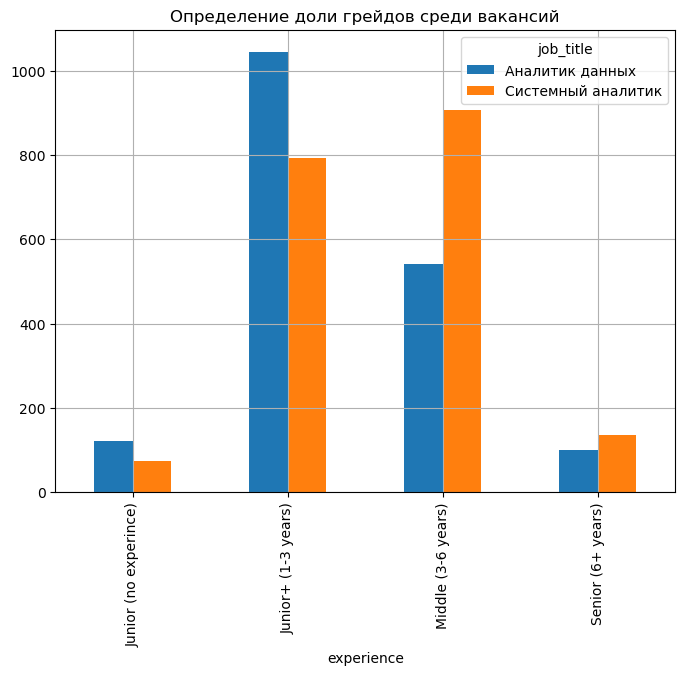

In [18]:
data_1=data.pivot_table(index=['job_title', 'experience'], values='id', aggfunc='count').reset_index()
data_1['percentage']=100*data_1['id'] / (data_1['id'].sum())
data_1['percentage']=data_1['percentage'].round(2)
display(data_1.sort_values(by='percentage', ascending=False))
data.pivot_table(index='experience', 
                 columns='job_title', 
                 values='id', 
                 aggfunc='count').T.sort_values(by='Junior+ (1-3 years)', ascending=False).T.plot(kind='bar', 
                                                                                                  grid=True, 
                                                                                                  figsize=(8, 6),
                                                                                                 title='Определение доли грейдов среди вакансий')

Как видно из графика, больше всего спросом пользуются джуны+ (с опытом) по аналитике данных с долей 28.15%, далее мидлы системных аналитиков с долей 24.43%. В общем говоря, согласно графику, джуны+ и мидлы пользуются спросом в обоих направлениях 

**5. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам:**
- ТОП-работодателей
- зарплата
- тип занятости
- график работы.

Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

- ТОП-работодателей

'Таблица вакансий аналитика данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),All
employer,,,,,
All,120.0,1046.0,542.0,99.0,1807
СБЕР,12.0,143.0,69.0,20.0,244
WILDBERRIES,1.0,11.0,26.0,5.0,43
Ozon,2.0,17.0,15.0,NaN,34
Банк ВТБ (ПАО),1.0,23.0,4.0,NaN,28
Т1,NaN,5.0,20.0,1.0,26
"МАГНИТ, Розничная сеть",7.0,11.0,2.0,4.0,24
МТС,1.0,7.0,14.0,NaN,22
Okko,NaN,12.0,1.0,6.0,19


'Таблица вакансий системного аналитика'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),All
employer,,,,,
All,73.0,794.0,908.0,134.0,1909
СБЕР,2.0,39.0,47.0,6.0,94
Т1,2.0,15.0,56.0,7.0,80
Aston,16.0,25.0,23.0,1.0,65
Совкомбанк Технологии,NaN,19.0,9.0,9.0,37
ПСБ (ПАО «Промсвязьбанк»),NaN,9.0,20.0,1.0,30
Selecty,NaN,13.0,8.0,1.0,22
Т-Банк,NaN,3.0,18.0,1.0,22
Ростелеком Информационные Технологии,NaN,10.0,8.0,NaN,18


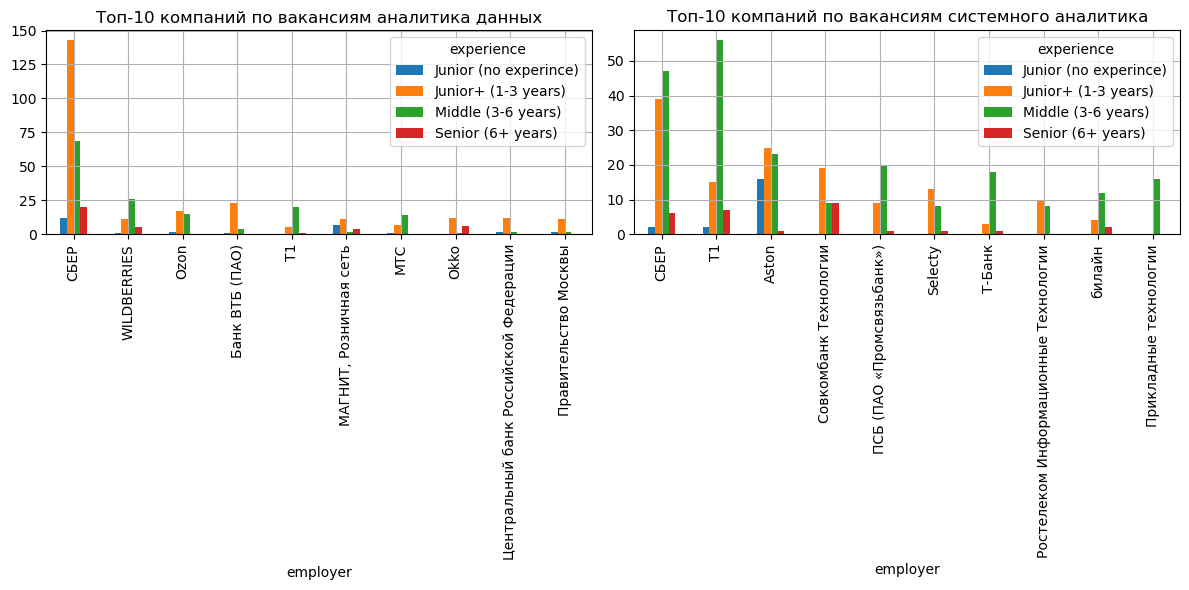

In [19]:
data_2=data[data['job_title']=='Аналитик данных'].pivot_table(index='employer', 
               values='id', 
               columns='experience', 
               aggfunc='count',
               margins=True, margins_name='All').sort_values(by='All', ascending=False)

display('Таблица вакансий аналитика данных', data_2.head(11))
data_2=data_2.drop('All', axis=0)
data_2=data_2.drop('All', axis=1)


data_3=data[data['job_title']=='Системный аналитик'].pivot_table(index='employer', 
               values='id', 
               columns='experience', 
               aggfunc='count',
               margins=True, margins_name='All').sort_values(by='All', ascending=False)

display('Таблица вакансий системного аналитика', data_3.head(11))
data_3=data_3.drop('All', axis=0)
data_3=data_3.drop('All', axis=1)



fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

data_2.head(10).plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title("Топ-10 компаний по вакансиям аналитика данных")

data_3.head(10).plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title("Топ-10 компаний по вакансиям системного аналитика")

plt.tight_layout()

plt.show()

По графику можно сказать, что работадатели в основном ищут джунов+ и мидлов, как было показано ранее. Скорее, это связано с тем, что 1. компания не нанимает сениоров, т.к. хочет, чтобы работники уровня мидл в которые уже работают в компании, в будущем стали сениором именно в этой компании зная определенные детали работы. 2. Сениоры требуют большую оплату, соответственно, дешевле нанять мидля и платить в 2 раза меньше!

В D/A ТОП-работадателей это СБЕР, WILDBERRIES и Ozon, где СБЕР в основном предлагает работу по грейду джун+(143 вакансий) и мидл(69 вакансий); WILDBERRIES джун+(11 вакансий) и мидл(26 вакансий); Ozon джун+(17 вакансий) и мидл(15 вакансий)

В S/A ТОП-работадателей это СБЕР, Т1 и Aston, где СБЕР в основном предлагает работу по грейду джун+(39 вакансий) и мидл(47 вакансий); Т1 джун+(15 вакансий) и мидл(56 вакансий); Aston джун(16 вакансий), джун+(25 вакансий) и мидл(23 вакансий)

- зарплата

,id
salary_bin,
Больше 300 тысяч,112
ЗП не указана,2858
Меньше 100 тысяч,274
От 100 тысяч до 200 тысяч,309
От 200 тысяч до 300 тысяч,163


'Аналитик данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
salary_bin,,,,
Больше 300 тысяч,NaN,2.0,23.0,4.0
Меньше 100 тысяч,53.0,125.0,14.0,NaN
От 100 тысяч до 200 тысяч,6.0,103.0,44.0,3.0
От 200 тысяч до 300 тысяч,NaN,25.0,22.0,3.0


'Системный аналитик'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
salary_bin,,,,
Больше 300 тысяч,2,7,58,16
Меньше 100 тысяч,37,41,3,1
От 100 тысяч до 200 тысяч,5,94,48,6
От 200 тысяч до 300 тысяч,1,33,72,7


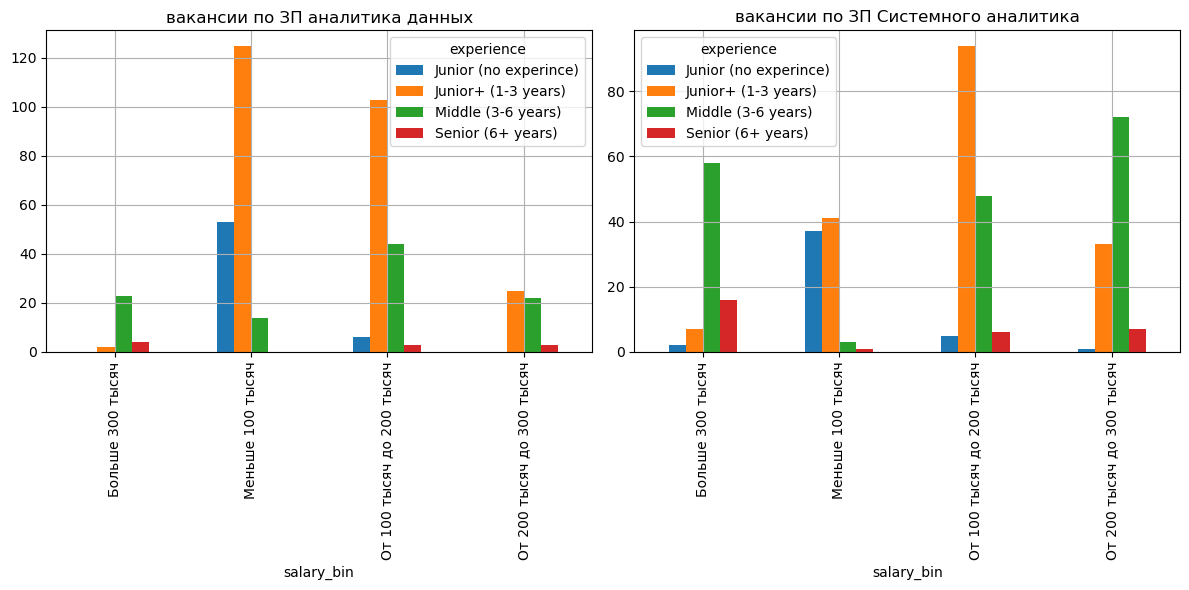

In [20]:
without_money_info=data.pivot_table(index='salary_bin', values='id', aggfunc='count')
display(without_money_info)
da_data=data[(data['job_title']=='Аналитик данных')& (data['salary_bin']!='ЗП не указана')].pivot_table(index='salary_bin', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count')
display('Аналитик данных', da_data)

ds_data=data[(data['job_title']=='Системный аналитик')& (data['salary_bin']!='ЗП не указана')].pivot_table(index='salary_bin', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count')
display('Системный аналитик', ds_data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

da_data.plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title("вакансии по ЗП аналитика данных")

ds_data.plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title("вакансии по ЗП Системного аналитика")

plt.tight_layout()

plt.show()

Итак, в 2858 вакансиях не указана ЗП, и указана лишь в 858 вакансиях. 
Видимо, D/A совсем принижают. Среди всех категорий заработных плат спецам D/A готовы платить меньше 100 тыс в основном для джунов с опытом и без. от 100 до 200 тыс готовы платить около 156 ед предприятий, и всего 50 предприятий готовы платить от 200 до 300 тыс. 

В S/A дела обстоят лучше! Количество предприятий которые готовы заплатить по всем категориям примерно равны. Но в отличии от D/A, в S/A меньшему количество спецов предлагается работа по греду мидл при оплате меньше 100 тыс! 
Необходимо, напомнить, что в обоих случаях, чаще всего рассмотриваются грейды джун и мидл. 

- тип занятости

'Аналитик данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
employment,,,,
Полная занятость,102.0,1033.0,536.0,99.0
Проектная работа,NaN,4.0,1.0,NaN
Стажировка,15.0,1.0,NaN,NaN
Частичная занятость,3.0,8.0,5.0,NaN


'Системный аналитик'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
employment,,,,
Полная занятость,43.0,793.0,902.0,133.0
Проектная работа,NaN,1.0,2.0,NaN
Стажировка,29.0,NaN,NaN,NaN
Частичная занятость,1.0,NaN,4.0,1.0


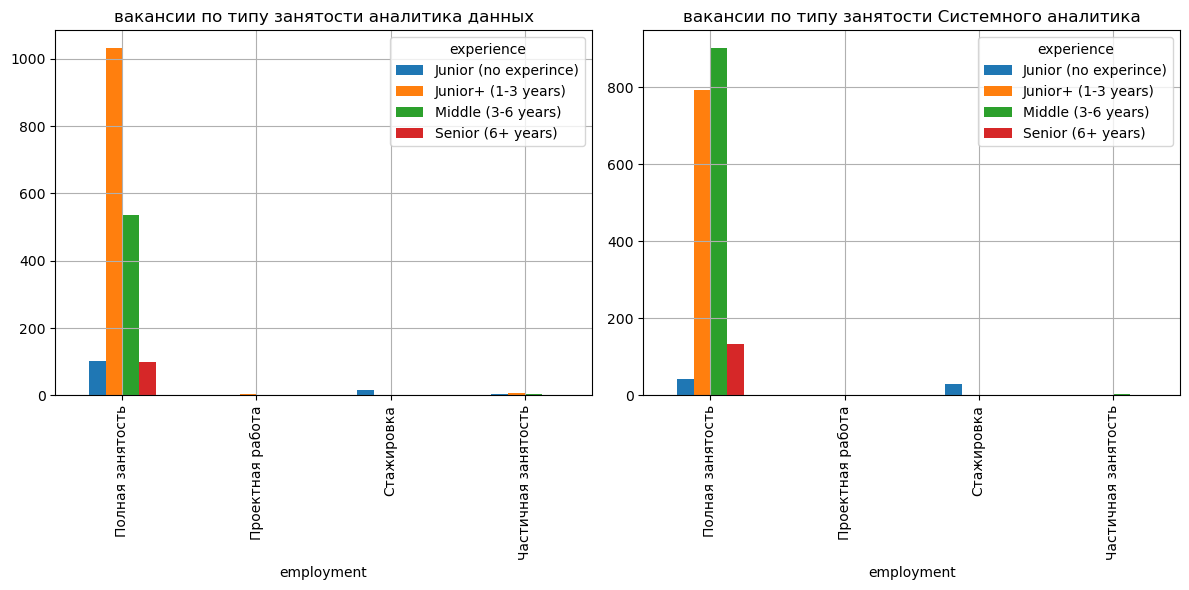

In [21]:
da_data_1=data[data['job_title']=='Аналитик данных'].pivot_table(index='employment', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count')
display('Аналитик данных', da_data_1)

ds_data_1=data[data['job_title']=='Системный аналитик'].pivot_table(index='employment', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count')
display('Системный аналитик', ds_data_1)



fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

da_data_1.plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title("вакансии по типу занятости аналитика данных")

ds_data_1.plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title("вакансии по типу занятости Системного аналитика")

plt.tight_layout()

plt.show()

Тут даже говорить нечего. Графики говорят сами за себя! В большинстве случаев, работадателю нужен специалист с полной занятостью. Изредка, в остальных случаях, частичная занятость, Проектная работа и стажировка. 

- график работы.

'Аналитик данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
schedule,,,,
Гибкий график,3.0,19.0,18.0,1.0
Полный день,105.0,876.0,400.0,66.0
Сменный график,1.0,8.0,NaN,NaN
Удаленная работа,11.0,143.0,124.0,32.0


'Системный аналитик'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
schedule,,,,
Гибкий график,6.0,32.0,17.0,6.0
Полный день,41.0,529.0,547.0,80.0
Сменный график,NaN,NaN,1.0,NaN
Удаленная работа,26.0,233.0,343.0,48.0


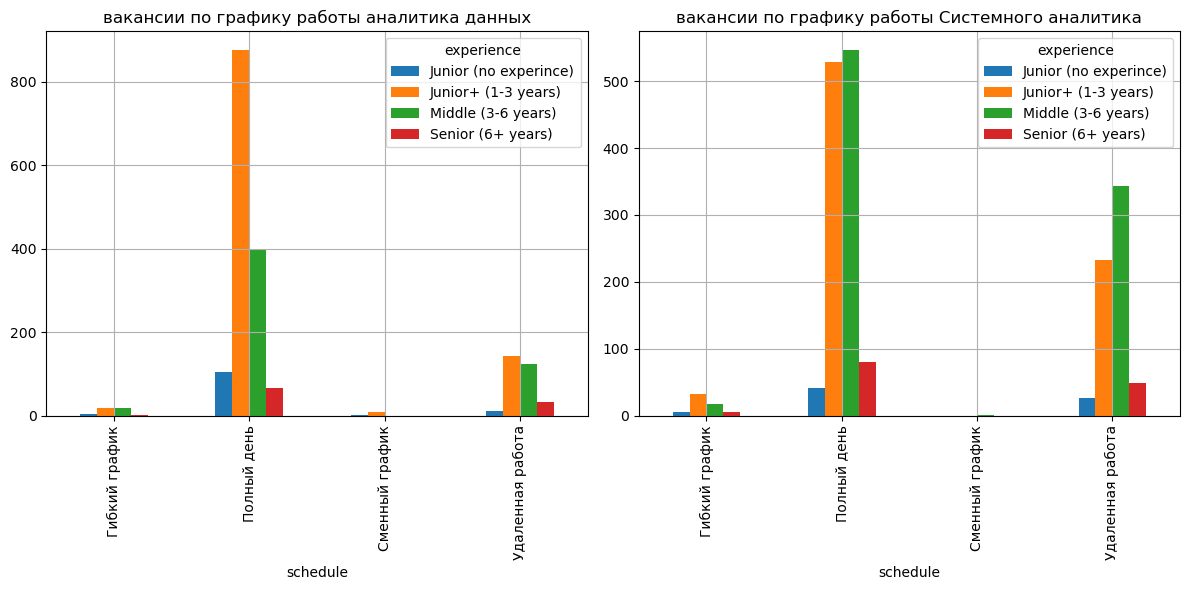

In [22]:
da_data_2=data[data['job_title']=='Аналитик данных'].pivot_table(index='schedule', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count')
display('Аналитик данных', da_data_2)

ds_data_2=data[data['job_title']=='Системный аналитик'].pivot_table(index='schedule', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count')
display('Системный аналитик', ds_data_2)


fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

da_data_2.plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title("вакансии по графику работы аналитика данных")

ds_data_2.plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title("вакансии по графику работы Системного аналитика")

plt.tight_layout()

plt.show()

Как мы говорили в прошлом задании, что работадатель рассчитывает на полную занятость в обоих случаях, и тут тоже не исключение. Работадатель, в основном, требует полного рабочего дня. Но в случае S/A, 50 % случаев от всех ее вакансий, есть вакансии по графику работы "удаленная работа". Таким образом полный день 63%, удаленная работа 34%, в то время как в D/A соотношение удаленной работы ко всем составляет 16%, полный день 80%

**6. Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.**

In [23]:
display('Аналитик данных', data[data['job_title']=='Аналитик данных'][['hard_skills_from_description', 'soft_skills_from_description']].info())
print()
display('Системный аналитик', data[data['job_title']=='Системный аналитик'][['hard_skills_from_description', 'soft_skills_from_description']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1807 entries, 0 to 3559
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   hard_skills_from_description  422 non-null    object
 1   soft_skills_from_description  593 non-null    object
dtypes: object(2)
memory usage: 42.4+ KB


'Аналитик данных'

None


<class 'pandas.core.frame.DataFrame'>
Index: 1909 entries, 1801 to 3715
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   hard_skills_from_description  566 non-null    object
 1   soft_skills_from_description  1422 non-null   object
dtypes: object(2)
memory usage: 44.7+ KB


'Системный аналитик'

None

In [24]:
display('Аналитик данных', data[data['job_title']=='Аналитик данных'].pivot_table(index='experience', 
                                                       values=['hard_skills_from_description', 'soft_skills_from_description'], 
                                                       aggfunc='count', 
                                                       ))
display('Системный аналитик', data[data['job_title']=='Системный аналитик'].pivot_table(index='experience', 
                                                       values=['hard_skills_from_description', 'soft_skills_from_description'], 
                                                       aggfunc='count', 
                                                       ))

'Аналитик данных'

,hard_skills_from_description,soft_skills_from_description
experience,,
Junior (no experince),17,40
Junior+ (1-3 years),224,353
Middle (3-6 years),144,174
Senior (6+ years),37,26


'Системный аналитик'

,hard_skills_from_description,soft_skills_from_description
experience,,
Junior (no experince),9,48
Junior+ (1-3 years),220,578
Middle (3-6 years),294,704
Senior (6+ years),43,92


D/A
по требованию работадателя мягкие навыки - 593; твердые навики - 422 
S/A 
по требованию работадателя мягкие навыки - 1422; твердые навики - 566

В аналитике данных мягких требований больше чем твердых на 171 ед 
В системной аналитике мягких требований больше чем твердых на 856 ед 

В обоих направлениях требования больше к джуну+ и мидлу (по тому как вакансий для джунов+ и мидлов подавляющее большинство)

**7. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам:**
- самые важные hard-skils
- самые важные soft-skils

  
Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [25]:
display(data['hard_skills_from_description'].value_counts())
print()
display(data['soft_skills_from_description'].value_counts())

hard_skills_from_description
confluence                    636
Pandas                        266
Юнит-экономика                 39
Pandas, confluence             30
confluence, Юнит-экономика      9
Pandas, Юнит-экономика          4
Google Sheets                   2
Pandas, Google Sheets           1
Математическая статистика       1
Name: count, dtype: int64

soft_skills_from_description
Документация                                                                        1168
Коммуникация, Документация                                                           213
Коммуникация                                                                         175
Аналитическое мышление                                                               148
Документация, Аналитическое мышление                                                  89
Проактивность                                                                         33
Документация, Проактивность                                                           29
Документация, Переговоры                                                              22
Коммуникация, Документация, Аналитическое мышление                                    15
Проактивность, Аналитическое мышление                                                 15
Коммуникация, Проактивность                                                      

'Аналитик данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),All
hard_skills_from_description,,,,,
Google Sheets,NaN,2.0,NaN,NaN,2
Pandas,15.0,137.0,98.0,13.0,263
"Pandas, Google Sheets",NaN,NaN,1.0,NaN,1
"Pandas, confluence",NaN,17.0,10.0,3.0,30
"Pandas, Юнит-экономика",NaN,4.0,NaN,NaN,4
confluence,2.0,47.0,30.0,14.0,93
Математическая статистика,NaN,1.0,NaN,NaN,1
Юнит-экономика,NaN,16.0,5.0,7.0,28
All,17.0,224.0,144.0,37.0,422


'Системный аналитик'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),All
hard_skills_from_description,,,,,
Pandas,NaN,2.0,1.0,NaN,3
confluence,9.0,212.0,282.0,40.0,543
"confluence, Юнит-экономика",NaN,2.0,6.0,1.0,9
Юнит-экономика,NaN,4.0,5.0,2.0,11
All,9.0,220.0,294.0,43.0,566


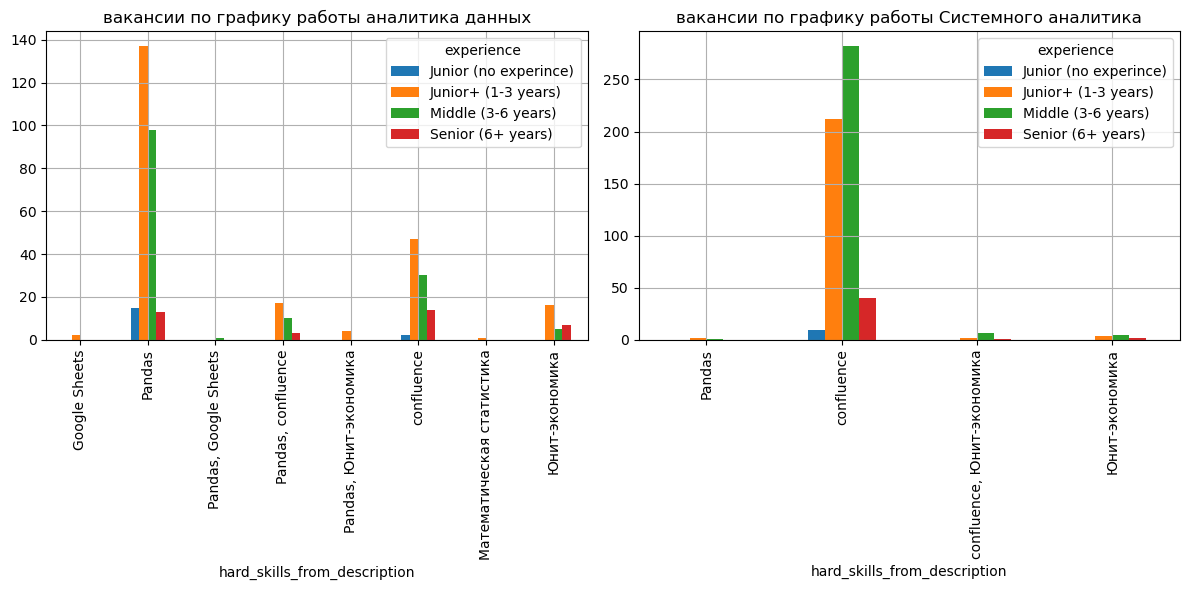

In [26]:
da_data_3=data[data['job_title']=='Аналитик данных'].pivot_table(index='hard_skills_from_description', 
                                                       values='id', 
                                                       columns='experience', 
                                                       aggfunc='count', 
                                                       margins=True, margins_name='All')

display('Аналитик данных', da_data_3)
da_data_3=da_data_3.drop('All', axis=0)
da_data_3=da_data_3.drop('All', axis=1)

ds_data_3=data[data['job_title']=='Системный аналитик'].pivot_table(index='hard_skills_from_description', 
                                                       values='id', 
                                                       columns='experience', 
                                                       aggfunc='count', 
                                                       margins=True, margins_name='All')
display('Системный аналитик', ds_data_3)

ds_data_3=ds_data_3.drop('All', axis=0)
ds_data_3=ds_data_3.drop('All', axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 


da_data_3.plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title("вакансии по графику работы аналитика данных")

ds_data_3.plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title("вакансии по графику работы Системного аналитика")

plt.tight_layout()

plt.show()

In [27]:
display('Аналитик данных', data[data['job_title']=='Аналитик данных'].pivot_table(index='hard_skills_from_description', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count'))

display('Системный аналитик', data[data['job_title']=='Системный аналитик'].pivot_table(index='hard_skills_from_description', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count'))
display('Аналитик данных', data[data['job_title']=='Аналитик данных'].pivot_table(index='soft_skills_from_description', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count',
                                                                                 margins=True, margins_name='All').sort_values(by='All', ascending=False))
display('Системный аналитик', data[data['job_title']=='Системный аналитик'].pivot_table(index='soft_skills_from_description', 
                                                                                  values='id', 
                                                                                  columns='experience', 
                                                                                  aggfunc='count',
                                                                                  margins=True, margins_name='All').sort_values(by='All', ascending=False))

'Аналитик данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
hard_skills_from_description,,,,
Google Sheets,NaN,2.0,NaN,NaN
Pandas,15.0,137.0,98.0,13.0
"Pandas, Google Sheets",NaN,NaN,1.0,NaN
"Pandas, confluence",NaN,17.0,10.0,3.0
"Pandas, Юнит-экономика",NaN,4.0,NaN,NaN
confluence,2.0,47.0,30.0,14.0
Математическая статистика,NaN,1.0,NaN,NaN
Юнит-экономика,NaN,16.0,5.0,7.0


'Системный аналитик'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
hard_skills_from_description,,,,
Pandas,NaN,2.0,1.0,NaN
confluence,9.0,212.0,282.0,40.0
"confluence, Юнит-экономика",NaN,2.0,6.0,1.0
Юнит-экономика,NaN,4.0,5.0,2.0


'Аналитик данных'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),All
soft_skills_from_description,,,,,
All,40.0,353.0,174.0,26.0,593
Документация,9.0,111.0,91.0,8.0,219
Аналитическое мышление,7.0,91.0,10.0,1.0,109
Коммуникация,11.0,61.0,25.0,8.0,105
"Коммуникация, Документация",1.0,21.0,11.0,1.0,34
Проактивность,4.0,16.0,8.0,2.0,30
"Документация, Аналитическое мышление",1.0,8.0,3.0,NaN,12
"Коммуникация, Проактивность",NaN,6.0,2.0,NaN,8
"Проактивность, Аналитическое мышление",NaN,3.0,3.0,1.0,7


'Системный аналитик'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),All
soft_skills_from_description,,,,,
All,48.0,578.0,704.0,92.0,1422
Документация,22.0,375.0,493.0,59.0,949
"Коммуникация, Документация",2.0,71.0,90.0,16.0,179
"Документация, Аналитическое мышление",16.0,34.0,24.0,3.0,77
Коммуникация,3.0,29.0,33.0,5.0,70
Аналитическое мышление,2.0,23.0,14.0,NaN,39
"Документация, Проактивность",NaN,7.0,18.0,2.0,27
"Документация, Переговоры",NaN,3.0,14.0,2.0,19
"Коммуникация, Документация, Аналитическое мышление",2.0,6.0,1.0,NaN,9


1. Изначально, посмотрим только на жесткие и мягкие навыки в целом. 

Мы видим, что:
В жестких навыках больше всего упоминается confluence - 636 упоминаний в единственном числе; далее библиотека Pandas в пайтоне - 266 упоминаний; и Юнит-экономика 39 упоминаний. 


В мягких навыках больше всего упоминается документация - 1168 раз; коммуникация, документация - 213 раз; коммуникация - 175 раз; аналитическое мышление - 148 паз.

2. При разделение жестких навыков по направлений и грейдам:
   
для D/A: 
- для Джуна - 17 навыков; джуна+ - 224 навыков; мидл - 144 навыков; сениор - 37 навыков. 
Топ навыков по всем грейдам больше всего требуется знание библиотеки pandas - 263 упоминаний; confluence - 93 упоминаний; Юнит-экономика - 28 упоминаний.

для S/A: 
- для Джуна - 9 навыков; джуна+ - 220 навыков; мидл - 294 навыков; сениор - 43 навыков. 
В основном, для всем грейдам больше всего требуется знание confluence - 543 упоминаний; Юнит-экономика - 20 упоминаний. 

3. При разделение мягких навыков по направлений и грейдам:
   
для D/A: 
- для Джуна - 40 навыков; джуна+ - 353 навыков; мидл - 174 навыков; сениор - 26 навыков. 
Топ навыков по всем грейдам больше всего требуется знание документации - 219 упоминаний; аналитическое мышление - 109 упоминаний; коммуникация - 105 упоминаний; коммуникация, документации вместе - 34 упоминаний и проактивность - 30 упоминаний.

для S/A: 
- для Джуна - 48 навыков; джуна+ - 578 навыков; мидл - 704 навыков; сениор - 92 навыков. 
Топ навыков по всем грейдам больше всего требуется знание документации - 949 упоминаний; коммуникация, документации вместе - 179 упоминаний; документации, аналитическое мышление - 77 упоминаний; коммуникация - 70 упоминаний;  и аналитическое мышление - 39 упоминаний.

**Вывод**

**Описание проекта:** Анализ данных вакансий HH.ru

**Цель проекта:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

**Проделанная работа.** 
1. **Предобработка данных.** Загрузил данные и соединил их по вертикали. После проверил типы данных, пропуски, дубликаты, неявные дубликаты, убрал ненужные симвоы на столбце навыков, разделил предлагаемые заработные платы по категориям, разделил вакансии для аналитиков данных и системных аналитиков.
2. **Исследовательский анализ данных.**
3. **Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.** Заменил опыт требуемых специалистов в столбце experience опыт которых был неправильно написан исходя из того, что было указано в столбце name. 
4. **Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.** Определил доли гредов. В аналитике данных Junior - 3,23%, Junior+ - 28,15%, Middle - 14,59%, Senior - 2,66%. В то время как в системном аналитике Junior - 1,96%, Junior+ - 21,37%, Middle - 24,43%, Senior - 3,61%. Итак, в основном в обоих случаях, работадатели ищут специалистов Junior+ и Middle. Возможно, по тому как, Senior стоит дороже. 
5. **Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, - график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.** 
- ТОП-работодателей. В аналитике данных ТОП-3 работадателей это СБЕР, WILDBERRIES и Ozon, в то время как у системных аналитиков ТОП-3 работадателей это СБЕР, Т1 и Aston
- Зарплата. В 2858 вакансиях не указана ЗП, и указана лишь в 858 вакансиях. Среди всех категорий заработных плат, в большинстве случаев, аналитикам данных готовы платить меньше 100 тыс в основном для джунов с опытом и без. от 100 до 200 тыс готовы платить около 156 ед предприятий(Junior+ - 103 ед и Middle - 44 ед, остальные Junior и Senior), и всего 50 предприятий(Junior+ - 25 ед и Middle - 22 ед, и остальные) готовы платить от 200 до 300 тыс. 
У системных аналитиков дела обстоят лучше! Количество предприятий которые готовы заплатить по всем категориям примерно равны (от 30 ед до 90 ед). Но в отличии от D/A, в S/A меньшему количество спецов предлагается работа по греду мидл при оплате меньше 100 тыс! 
Необходимо, напомнить, что в обоих случаях, чаще всего рассмотриваются грейды джун и мидл.
- Тип занятости. В большинстве случаев, работадателю нужен специалист с полной занятостью. Изредка, в остальных случаях, частичная занятость, Проектная работа и стажировка.
- График работы. Работадатель рассчитывает на полную занятость в обоих случаях, и тут тоже не исключение. Работадатель, в основном, требует полного рабочего дня. Но в случае S/A, половины случаев от всех ее вакансий, есть вакансии по графику работы "удаленная работа". Таким образом полный день 63%, удаленная работа 34%, в то время как в D/A соотношение удаленной работы ко всем составляет 16%, полный день 80%
6. **Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.**
- В аналитике данных по требованию работадателя мягкие навыки - 593 ед; твердые навики - 422 ед.
- В системной аналитике по требованию работадателя мягкие навыки - 1422 ед; твердые навики - 566 ед.
  
В аналитике данных мягких требований больше. В системной аналитике мягких требований больше.
В обоих случаях, к специальности системный аналитик требований по навыком больше, чем к специальности аналитик данных. 
В обоих направлениях требования больше к джуну+ и мидлу (по тому как вакансий для джунов+ и мидлов подавляющее большинство)

8. **Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.**

Независимо от грейдов, необходимые самые важные навыки примерно одинаковые.

8.1. Жесткие навыки.
- Для аналитиков данных. Для Junior - 17 навыков; Junior+ - 224 навыков; Middle - 144 навыков; Senior - 37 навыков. Топ навыков по всем грейдам больше всего требуется знание библиотеки pandas - 263 упоминаний; confluence - 93 упоминаний; Юнит-экономика - 28 упоминаний.
- Для системных аналитиков. Для Junior - 9 навыков; Junior+ - 220 навыков; Middle - 294 навыков; Senior - 43 навыков. В основном, для всем грейдам больше всего требуется знание confluence - 543 упоминаний; Юнит-экономика - 20 упоминаний.

8.2. Мягкие навыки.
- Для аналитиков данных. Для Junior - 40 навыков; Junior+ - 353 навыков; Middle - 174 навыков; Senior - 26 навыков. Топ навыков по всем грейдам больше всего требуется знание документации - 219 упоминаний; аналитическое мышление - 109 упоминаний; коммуникация - 105 упоминаний; коммуникация, документации вместе - 34 упоминаний и проактивность - 30 упоминаний.
- Для системных аналитиков. Для Junior - 48 навыков; Junior+ - 578 навыков; Middle - 704 навыков; Senior - 92 навыков.  Топ навыков по всем грейдам больше всего требуется знание документации - 949 упоминаний; коммуникация, документации вместе - 179 упоминаний; документации, аналитическое мышление - 77 упоминаний; коммуникация - 70 упоминаний; и аналитическое мышление - 39 упоминаний.



**Итог.** 
1. В обоих направлениях требуется примерно одинаковые доли аналитиков данных и системных аналитиков по грейдам, где в основном, требуется Junior+ и Middle. (только в С/А требуется на 10% больше Middle, чем в А/Д)
2.
- ТОП-работодателей. В аналитике данных это СБЕР, WILDBERRIES и Ozon. В системной аналитике это СБЕР, Т1 и Aston
- Зарплата. У аналитиков данных меньше 100 тыс и от 100 до 200 тыс. У системных аналитиков Junior+ от меньше 100 тыс до 200 тыс, Middle от 200 тыс до выше 300 тыс.
- Тип занятости. Как правило Специалисты с полной занятостью в обоих случаях.
- График работы. У аналитика данных полный рабочий день. В системной аналитике полный рабочий день и удаленная работа.

3. В аналитике данных мягкие навыки - 593 ед; твердые навики - 422 ед. 
В системной аналитике мягкие навыки - 1422 ед; твердые навики - 566 ед
4. Самые важные hard-skils, самые важные soft-skils.
   
**Hard-skils.**
- У аналитиков данных библиотеки pandas, confluence и Юнит-экономика;
- У системных аналитиков confluence, Юнит-экономика.

**Soft-skils.**.- - У аналитиков данных документации, аналитическое мышление, коммуникация, коммуникация, документации, и проактивность;
- У системных аналитиков документации, коммуникация, документация, документации + аналитическое мышление, коммуникация и аналитическое мышление.
